Importing all the modules. Some may not be needed as of now. 

In [1]:
# modules - probably too many
import numpy as np
import pandas as pd
import pickle
import matplotlib
import scipy
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_text
from sklearn import neighbors
from matplotlib import pyplot as plt
from matplotlib import cm as cm
import matplotlib.colors as colors
from scipy import stats
pd.options.mode.chained_assignment = None  # default='warn'
import math
import seaborn as sns
import multiprocessing
import numpy.matlib as npm
import geeadd
import ee
#import mlLocal
from importlib import reload

Reading in all calibration data.

In [2]:
dfALL = pd.read_pickle('G:/cassidy/MODISLANDSAT/MODISLANDSATall.pkl')
dfALLtrim = pd.read_pickle('G:/cassidy/MODISLANDSAT/MODISLANDSATalltrim.pkl')
dfALLtrimKANG = pd.read_pickle('G:/cassidy/MODISLANDSAT/MODISLANDSATalltrimKANG.pkl')

Maps of Sample for each dataset

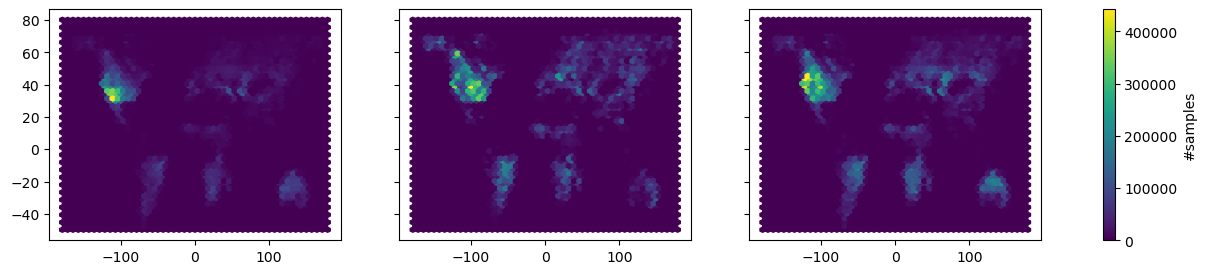

In [3]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(16,3), sharex=True, sharey=True)
cmap=cm.get_cmap('viridis')
hb = ax[0].hexbin(dfALL['Lon'],dfALL['Lat'], gridsize=(50),cmap=cmap)
hb = ax[1].hexbin(dfALLtrim['Lon'],dfALLtrim['Lat'], gridsize=(50),cmap=cmap)
hb = ax[2].hexbin(dfALLtrimKANG['Lon'], dfALLtrimKANG['Lat'], gridsize=(50),cmap=cmap)
# ax.set_title("Calibration Samples")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('#samples')
#plt.savefig('Figure1.png', bbox_inches='tight')
plt.show()

In [4]:
# Validation data for LAI and FAPAR
valbiomeDictLAI = pd.read_pickle('G:/cassidy/MODISLANDSAT/valbiomeDictLAI.pkl')
valbiomeDictFAPAR = pd.read_pickle('G:/cassidy/MODISLANDSAT/valbiomeDictFAPAR.pkl')

# Calibration data for LAI and FAPAR
calbiomeDictLAI = pd.read_pickle('G:/cassidy/MODISLANDSAT/calbiomeDictLAI.pkl')
calbiomeDictFAPAR = pd.read_pickle('G:/cassidy/MODISLANDSAT/calbiomeDictFAPAR.pkl')

# Kang's calibration data for LAI and FAPAR
calbiomeDictLAIKANG = pd.read_pickle('G:/cassidy/MODISLANDSAT/calbiomeDictLAIKANG.pkl')
calbiomeDictFAPARKANG = pd.read_pickle('G:/cassidy/MODISLANDSAT/calbiomeDictFAPARKANG.pkl')

# https://drive.google.com/drive/folders/1jVKwxWPlH7nYnpL1yJAUD2jFkXV3A1kf?usp=share_link

Maps of Sample for each LC_Type

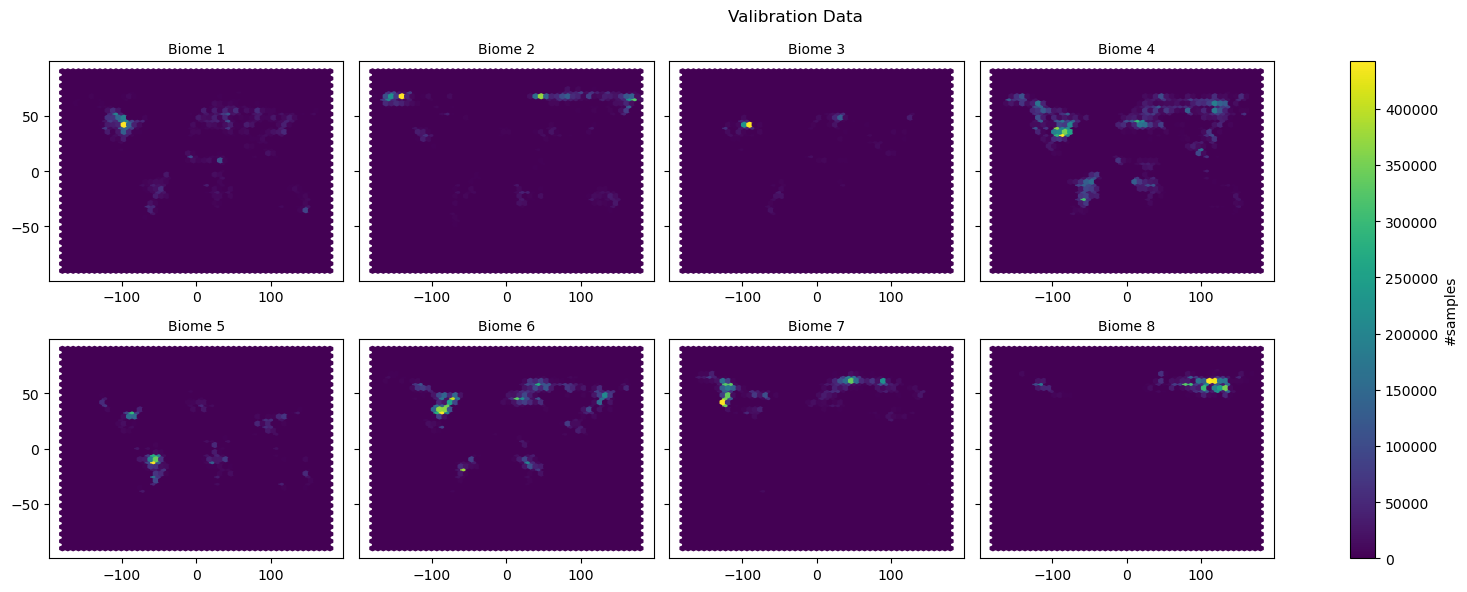

In [5]:
fig, axes = plt.subplots(2, 4, figsize=(16,6), sharey=True)
cmap=cm.get_cmap('viridis')
im=cm.ScalarMappable()
axes[0][0].hexbin(valbiomeDictLAI[1]['DF']['Lon'], valbiomeDictLAI[1]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[0][1].hexbin(valbiomeDictLAI[2]['DF']['Lon'], valbiomeDictLAI[2]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[0][2].hexbin(valbiomeDictLAI[3]['DF']['Lon'], valbiomeDictLAI[3]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[0][3].hexbin(valbiomeDictLAI[4]['DF']['Lon'], valbiomeDictLAI[4]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))

axes[1][0].hexbin(valbiomeDictLAI[5]['DF']['Lon'], valbiomeDictLAI[5]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[1][1].hexbin(valbiomeDictLAI[6]['DF']['Lon'], valbiomeDictLAI[6]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[1][2].hexbin(valbiomeDictLAI[7]['DF']['Lon'], valbiomeDictLAI[7]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[1][3].hexbin(valbiomeDictLAI[8]['DF']['Lon'], valbiomeDictLAI[8]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))

fig.suptitle('Valibration Data')

# Title biomes
axes[0][0].set_title('Biome 1', size=10)
axes[0][1].set_title('Biome 2', size=10)
axes[0][2].set_title('Biome 3', size=10)
axes[0][3].set_title('Biome 4', size=10)

axes[1][0].set_title('Biome 5', size=10)
axes[1][1].set_title('Biome 6', size=10)
axes[1][2].set_title('Biome 7', size=10)
axes[1][3].set_title('Biome 8', size=10)

fig.tight_layout()

#Add colorbar
cb = fig.colorbar(hb, ax=axes)
cb.set_label('#samples')

plt.show()

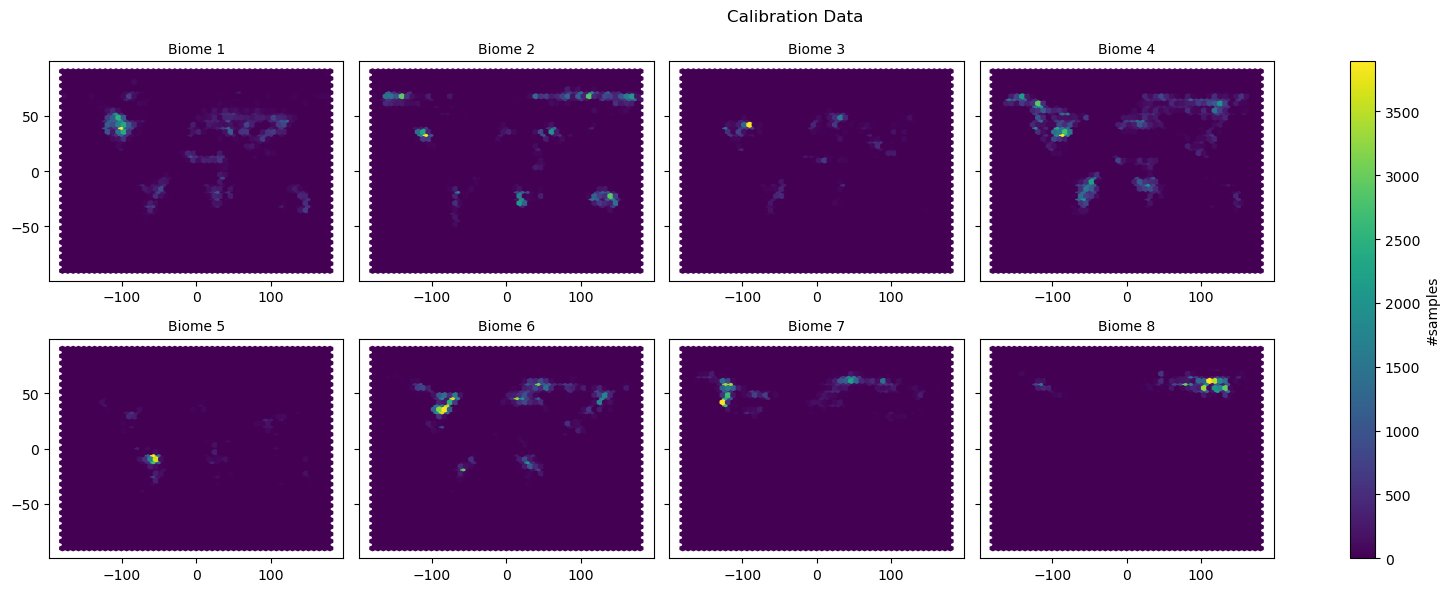

In [6]:
fig, axes = plt.subplots(2, 4, figsize=(16,6), sharey=True)
cmap=cm.get_cmap('viridis')
im=cm.ScalarMappable()
axes[0][0].hexbin(calbiomeDictLAI[1]['DF']['Lon'], calbiomeDictLAI[1]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[0][1].hexbin(calbiomeDictLAI[2]['DF']['Lon'], calbiomeDictLAI[2]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[0][2].hexbin(calbiomeDictLAI[3]['DF']['Lon'], calbiomeDictLAI[3]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[0][3].hexbin(calbiomeDictLAI[4]['DF']['Lon'], calbiomeDictLAI[4]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))

axes[1][0].hexbin(calbiomeDictLAI[5]['DF']['Lon'], calbiomeDictLAI[5]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[1][1].hexbin(calbiomeDictLAI[6]['DF']['Lon'], calbiomeDictLAI[6]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[1][2].hexbin(calbiomeDictLAI[7]['DF']['Lon'], calbiomeDictLAI[7]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
hb = axes[1][3].hexbin(calbiomeDictLAI[8]['DF']['Lon'], calbiomeDictLAI[8]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))

fig.suptitle('Calibration Data')

# Title biomes
axes[0][0].set_title('Biome 1', size=10)
axes[0][1].set_title('Biome 2', size=10)
axes[0][2].set_title('Biome 3', size=10)
axes[0][3].set_title('Biome 4', size=10)

axes[1][0].set_title('Biome 5', size=10)
axes[1][1].set_title('Biome 6', size=10)
axes[1][2].set_title('Biome 7', size=10)
axes[1][3].set_title('Biome 8', size=10)

fig.tight_layout()

#Add colorbar
cb = fig.colorbar(hb, ax=axes)
cb.set_label('#samples')

plt.show()

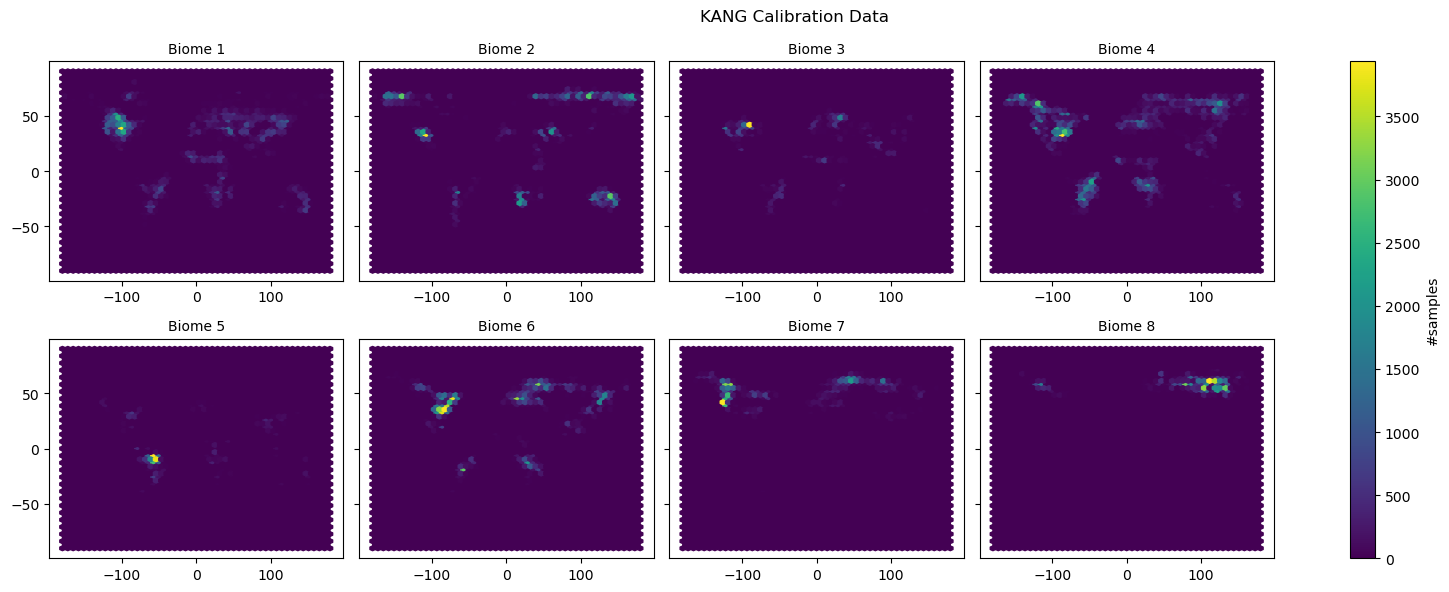

In [7]:
fig, axes = plt.subplots(2, 4, figsize=(16,6), sharey=True)
cmap=cm.get_cmap('viridis')
im=cm.ScalarMappable()
axes[0][0].hexbin(calbiomeDictLAIKANG[1]['DF']['Lon'], calbiomeDictLAIKANG[1]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[0][1].hexbin(calbiomeDictLAIKANG[2]['DF']['Lon'], calbiomeDictLAIKANG[2]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[0][2].hexbin(calbiomeDictLAIKANG[3]['DF']['Lon'], calbiomeDictLAIKANG[3]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[0][3].hexbin(calbiomeDictLAIKANG[4]['DF']['Lon'], calbiomeDictLAIKANG[4]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))

axes[1][0].hexbin(calbiomeDictLAIKANG[5]['DF']['Lon'], calbiomeDictLAIKANG[5]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[1][1].hexbin(calbiomeDictLAIKANG[6]['DF']['Lon'], calbiomeDictLAIKANG[6]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[1][2].hexbin(calbiomeDictLAIKANG[7]['DF']['Lon'], calbiomeDictLAIKANG[7]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
hb = axes[1][3].hexbin(calbiomeDictLAIKANG[8]['DF']['Lon'], calbiomeDictLAIKANG[8]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))

fig.suptitle('KANG Calibration Data')

# Title biomes
axes[0][0].set_title('Biome 1', size=10)
axes[0][1].set_title('Biome 2', size=10)
axes[0][2].set_title('Biome 3', size=10)
axes[0][3].set_title('Biome 4', size=10)

axes[1][0].set_title('Biome 5', size=10)
axes[1][1].set_title('Biome 6', size=10)
axes[1][2].set_title('Biome 7', size=10)
axes[1][3].set_title('Biome 8', size=10)

fig.tight_layout()

#Add colorbar
cb = fig.colorbar(hb, ax=axes)
cb.set_label('#samples')

plt.show()

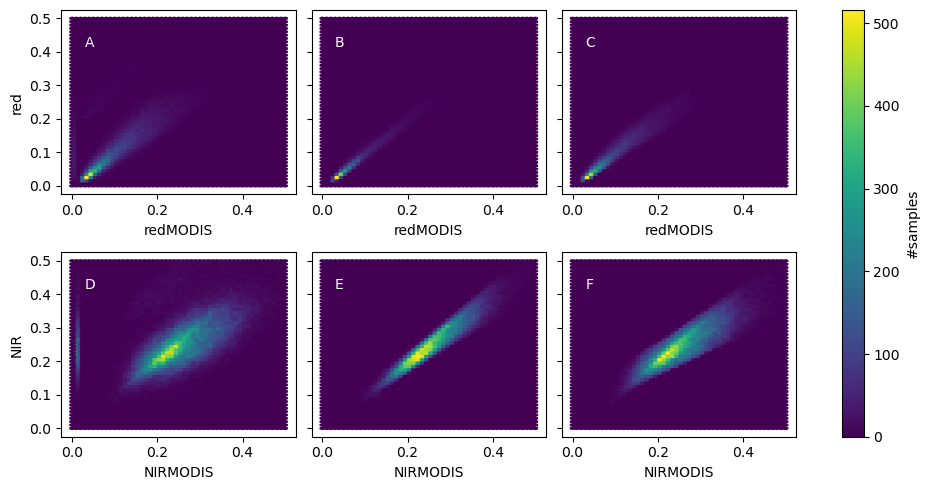

In [8]:
fig, axs = plt.subplots(nrows=2,ncols=3,sharey=True,figsize=(10,5))
dfA = dfALL.sample(100000) / 10000
axs[0,0].hexbin(dfA['redMODIS'],dfA['red'], gridsize=(50,50), extent=(0,0.5,0,0.5))
axs[0,0].set(xlabel='redMODIS', ylabel='red')
axs[1,0].hexbin(dfA['NIRMODIS'],dfA['NIR'], gridsize=(50,50), extent=(0,0.5,0,0.5))
axs[1,0].set(xlabel='NIRMODIS', ylabel='NIR')

dfT = dfALLtrim.sample(100000) / 10000
axs[0,1].hexbin(dfT['redMODIS'],dfT['red'], gridsize=(50,50), extent=(0,0.5,0,0.5))
axs[0,1].set(xlabel='redMODIS')
hb=axs[1,1].hexbin(dfT['NIRMODIS'],dfT['NIR'], gridsize=(50,50), extent=(0,0.5,0,0.5))
axs[1,1].set(xlabel='NIRMODIS')

dfK = dfALLtrimKANG.sample(100000) / 10000
axs[0,2].hexbin(dfK['redMODIS'],dfK['red'], gridsize=(50,50), extent=(0,0.5,0,0.5))
axs[0,2].set(xlabel='redMODIS')
hb=axs[1,2].hexbin(dfK['NIRMODIS'],dfK['NIR'], gridsize=(50,50), extent=(0,0.5,0,0.5))
axs[1,2].set(xlabel='NIRMODIS')

#Add colorbar
fig.tight_layout()
cb = fig.colorbar(hb, ax=axs)
cb.set_label('#samples')

#Add labels
axs[0,0].text(0.1, 0.8, 'A', size=10, color='white', transform=axs[0,0].transAxes)
axs[1,0].text(0.1, 0.8, 'D', size=10, color='white', transform=axs[1,0].transAxes)
axs[0,1].text(0.1, 0.8, 'B', size=10, color='white', transform=axs[0,1].transAxes)
axs[1,1].text(0.1, 0.8, 'E', size=10, color='white', transform=axs[1,1].transAxes)
axs[0,2].text(0.1, 0.8, 'C', size=10, color='white', transform=axs[0,2].transAxes)
axs[1,2].text(0.1, 0.8, 'F', size=10, color='white', transform=axs[1,2].transAxes)

plt.show()

Pairplots of sampled respose values by biome

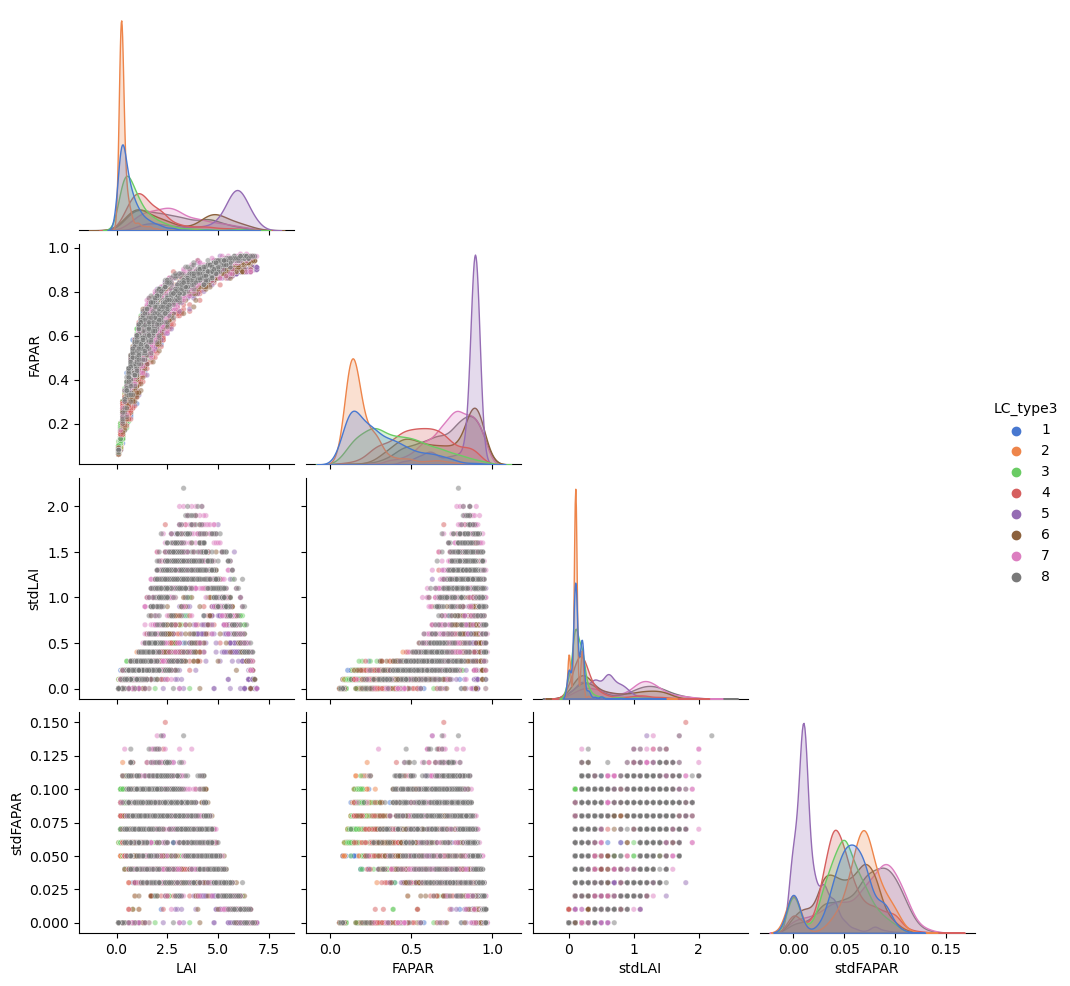

In [9]:
dfScaling = pd.DataFrame([[10., 100.,10.,100.,1]], columns=['LAI','FAPAR','stdLAI','stdFAPAR','LC_type3'])
dfPlot = dfALL.loc[dfALL['LC_type3']<9][['LAI','FAPAR','stdLAI','stdFAPAR','LC_type3']].groupby('LC_type3').sample(1000).div(dfScaling.iloc[0])
dfPlot['LC_type3'] = dfPlot['LC_type3'].astype(int)
pairplot = sns.pairplot(dfPlot,hue='LC_type3',palette='muted',plot_kws={"s": 15,'alpha':0.5},corner=True)
#pairplot.fig.savefig("Figure2.png", bbox_inches='tight') 

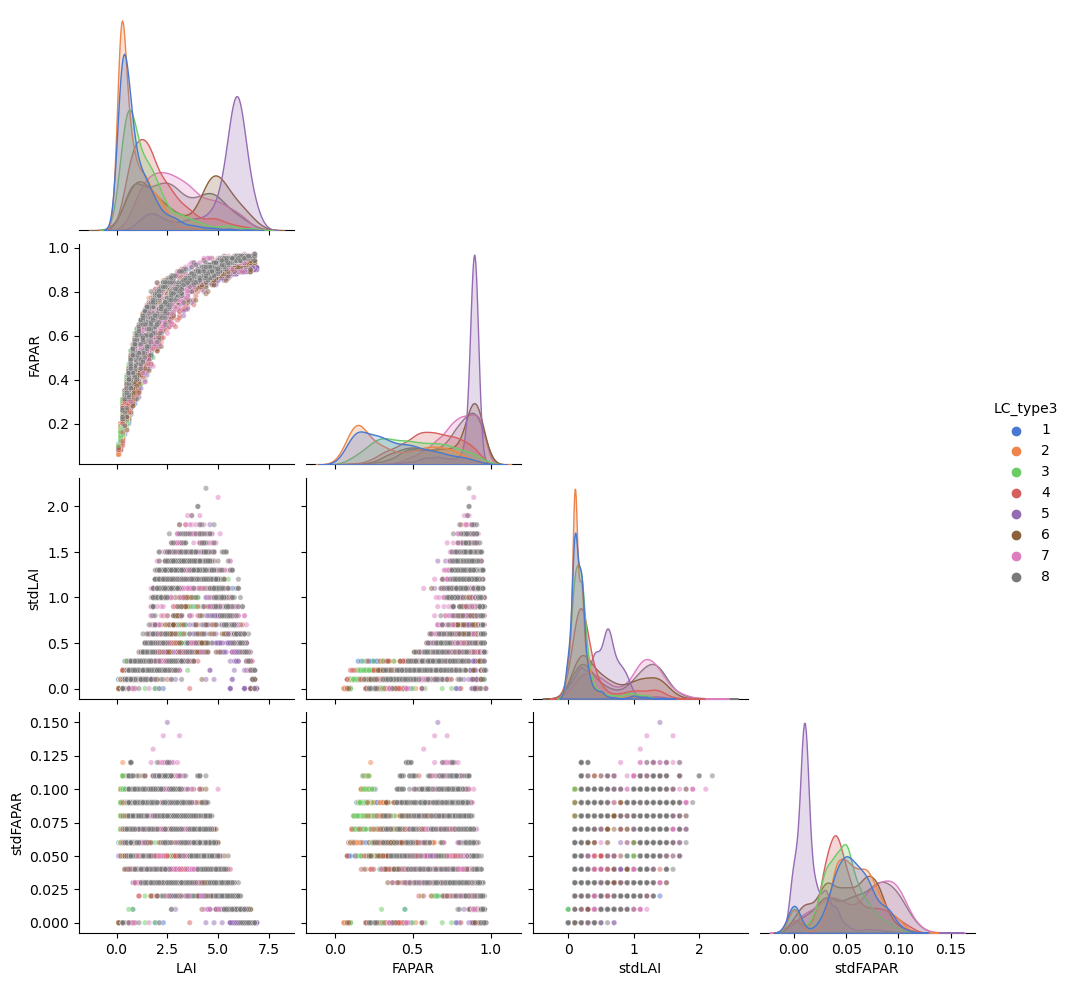

In [10]:
dfScaling = pd.DataFrame([[10., 100.,10.,100.,1]], columns=['LAI','FAPAR','stdLAI','stdFAPAR','LC_type3'])
dfPlot = dfALLtrim.loc[dfALLtrim['LC_type3']<9][['LAI','FAPAR','stdLAI','stdFAPAR','LC_type3']].groupby('LC_type3').sample(1000).div(dfScaling.iloc[0])
dfPlot['LC_type3'] = dfPlot['LC_type3'].astype(int)
pairplot = sns.pairplot(dfPlot,hue='LC_type3',palette='muted',plot_kws={"s": 15,'alpha':0.5},corner=True)
#pairplot.fig.savefig("Figure2.png", bbox_inches='tight') 

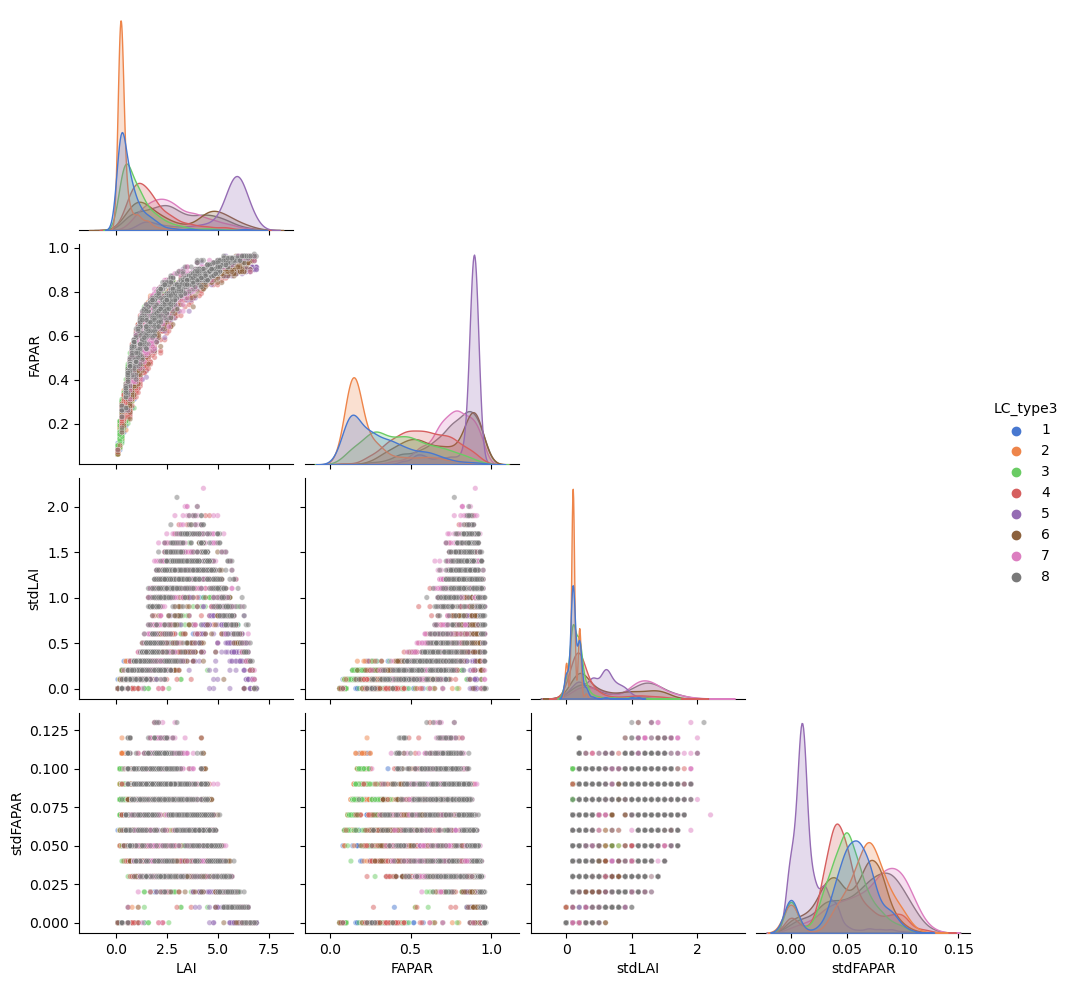

In [11]:
dfScaling = pd.DataFrame([[10., 100.,10.,100.,1]], columns=['LAI','FAPAR','stdLAI','stdFAPAR','LC_type3'])
dfPlot = dfALLtrimKANG.loc[dfALLtrimKANG['LC_type3']<9][['LAI','FAPAR','stdLAI','stdFAPAR','LC_type3']].groupby('LC_type3').sample(1000).div(dfScaling.iloc[0])
dfPlot['LC_type3'] = dfPlot['LC_type3'].astype(int)
pairplot = sns.pairplot(dfPlot,hue='LC_type3',palette='muted',plot_kws={"s": 15,'alpha':0.5},corner=True)
#pairplot.fig.savefig("Figure2.png", bbox_inches='tight') 

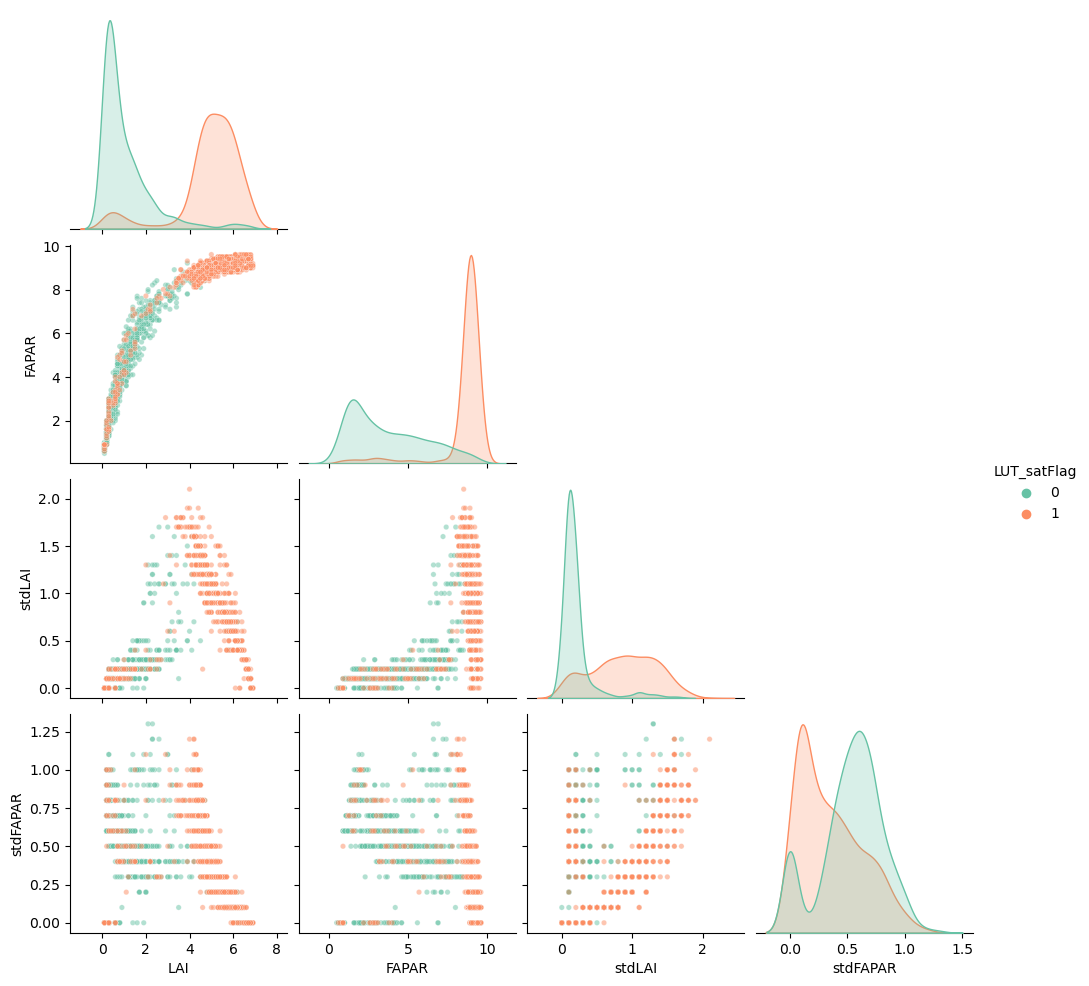

In [12]:
dfScaling = pd.DataFrame([[10., 10.,10.,10.,1]], columns=['LAI','FAPAR','stdLAI','stdFAPAR','LUT_satFlag'])
dfPlot = dfALL.loc[dfALL['LC_type3']<9][['LAI','FAPAR','stdLAI','stdFAPAR','LUT_satFlag']].groupby('LUT_satFlag').sample(1000).div(dfScaling.iloc[0])
dfPlot['LUT_satFlag'] = dfPlot['LUT_satFlag'].astype(int)
pairplot = sns.pairplot(dfPlot,hue='LUT_satFlag',palette='Set2',plot_kws={"s": 15,'alpha':0.5},corner=True)
#pairplot.fig.savefig("Figure3.png", bbox_inches='tight') 

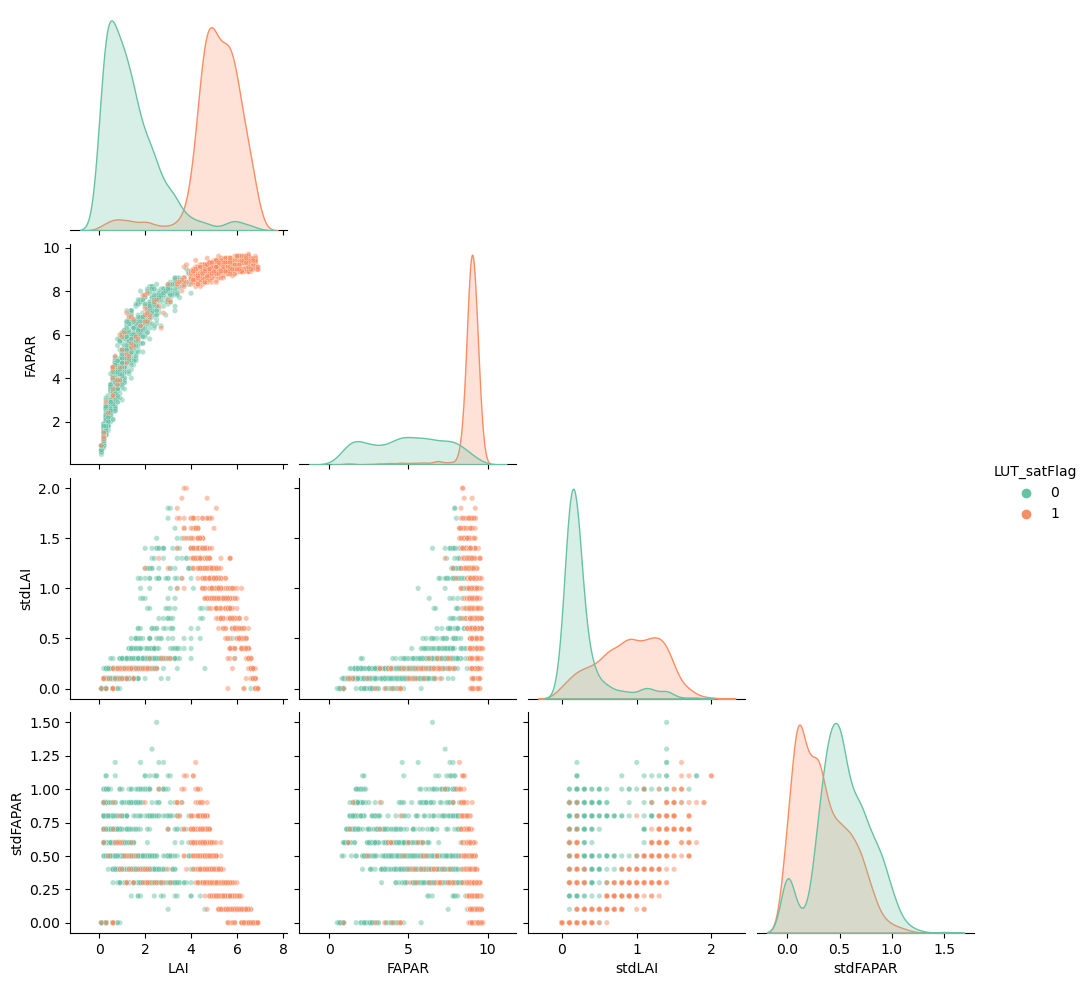

In [13]:
dfScaling = pd.DataFrame([[10., 10.,10.,10.,1]], columns=['LAI','FAPAR','stdLAI','stdFAPAR','LUT_satFlag'])
dfPlot = dfALLtrim.loc[dfALLtrim['LC_type3']<9][['LAI','FAPAR','stdLAI','stdFAPAR','LUT_satFlag']].groupby('LUT_satFlag').sample(1000).div(dfScaling.iloc[0])
dfPlot['LUT_satFlag'] = dfPlot['LUT_satFlag'].astype(int)
pairplot = sns.pairplot(dfPlot,hue='LUT_satFlag',palette='Set2',plot_kws={"s": 15,'alpha':0.5},corner=True)
#pairplot.fig.savefig("Figure3.png", bbox_inches='tight') 

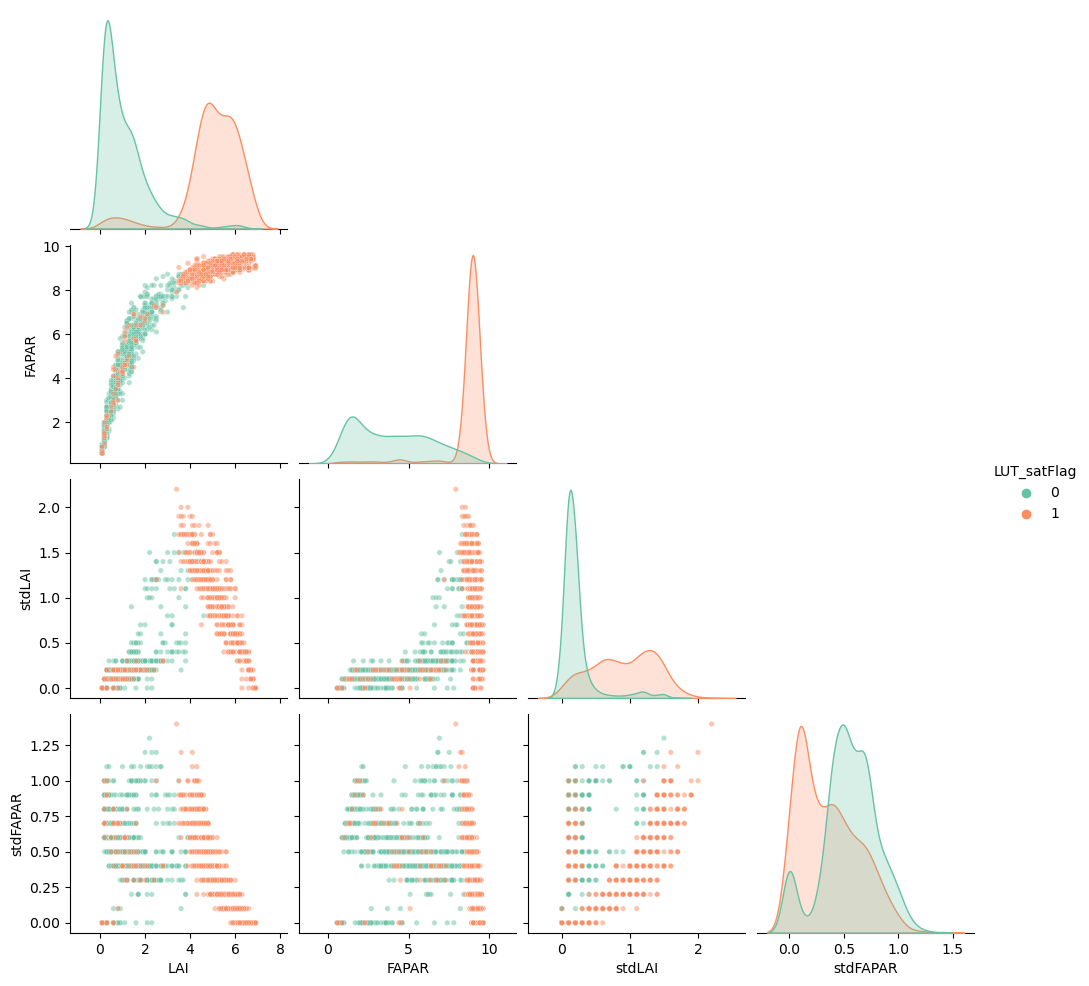

In [14]:
dfScaling = pd.DataFrame([[10., 10.,10.,10.,1]], columns=['LAI','FAPAR','stdLAI','stdFAPAR','LUT_satFlag'])
dfPlot = dfALLtrimKANG.loc[dfALLtrimKANG['LC_type3']<9][['LAI','FAPAR','stdLAI','stdFAPAR','LUT_satFlag']].groupby('LUT_satFlag').sample(1000).div(dfScaling.iloc[0])
dfPlot['LUT_satFlag'] = dfPlot['LUT_satFlag'].astype(int)
pairplot = sns.pairplot(dfPlot,hue='LUT_satFlag',palette='Set2',plot_kws={"s": 15,'alpha':0.5},corner=True)
#pairplot.fig.savefig("Figure3.png", bbox_inches='tight') 

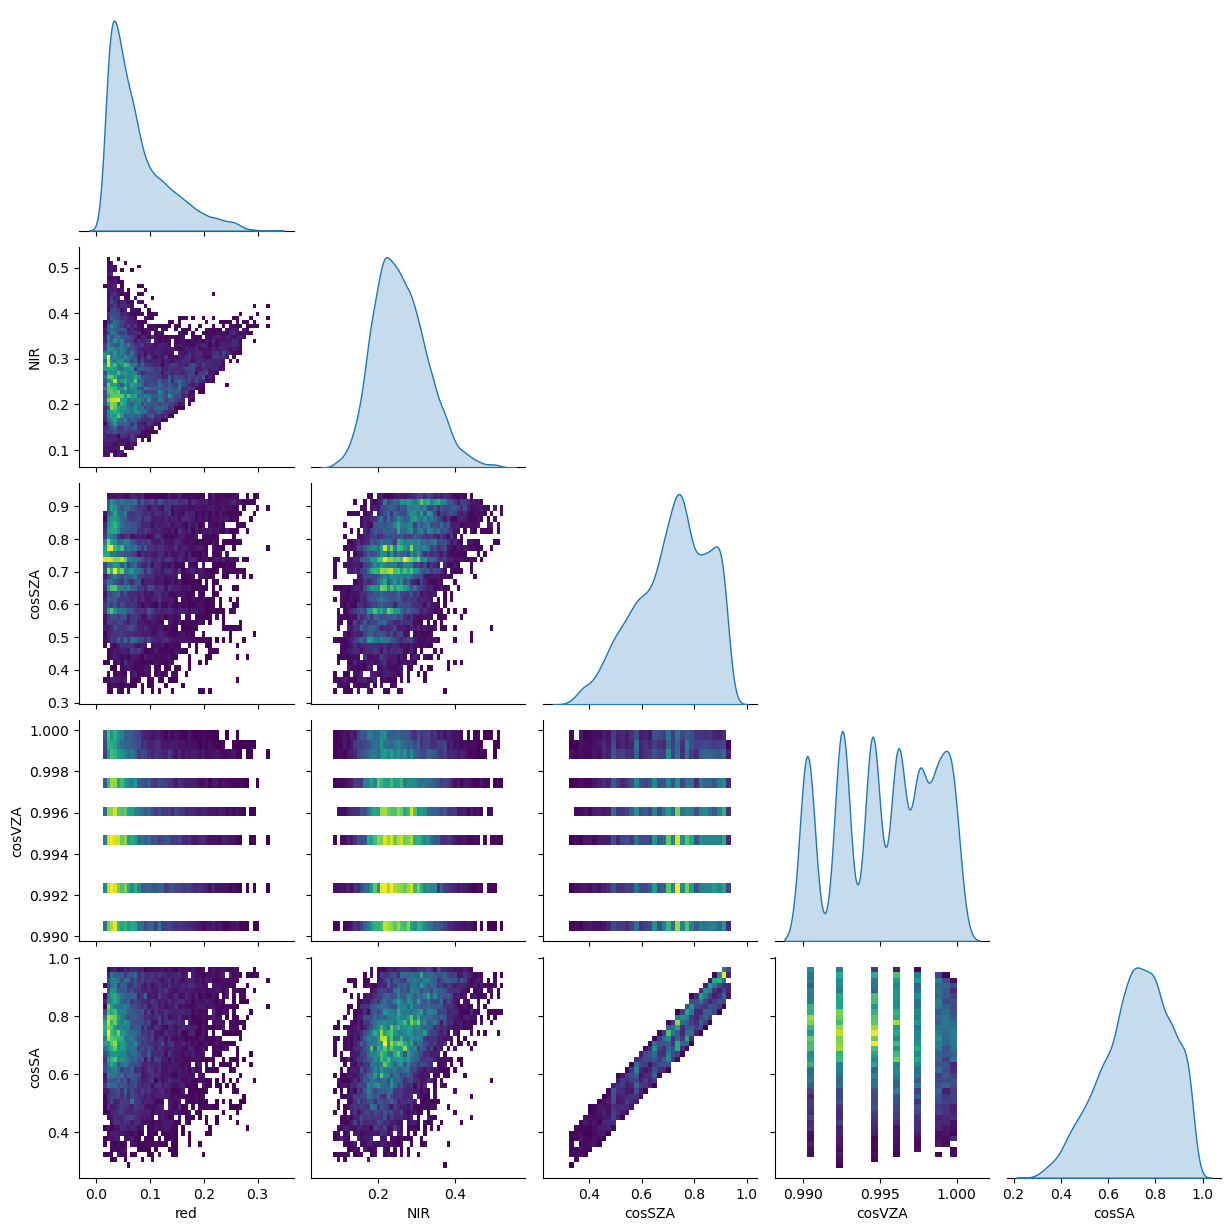

In [15]:
pairplot = sns.pairplot(dfALLtrim.loc[dfALLtrim['LC_type3']<9][['red','NIR','cosSZA','cosVZA','cosSA']].sample(10000).divide(10000),plot_kws={'cmap':'viridis'},kind='hist',diag_kind='kde',corner=True)
#pairplot.fig.savefig("Figure4.png", bbox_inches='tight') 

Graphs for dfALL

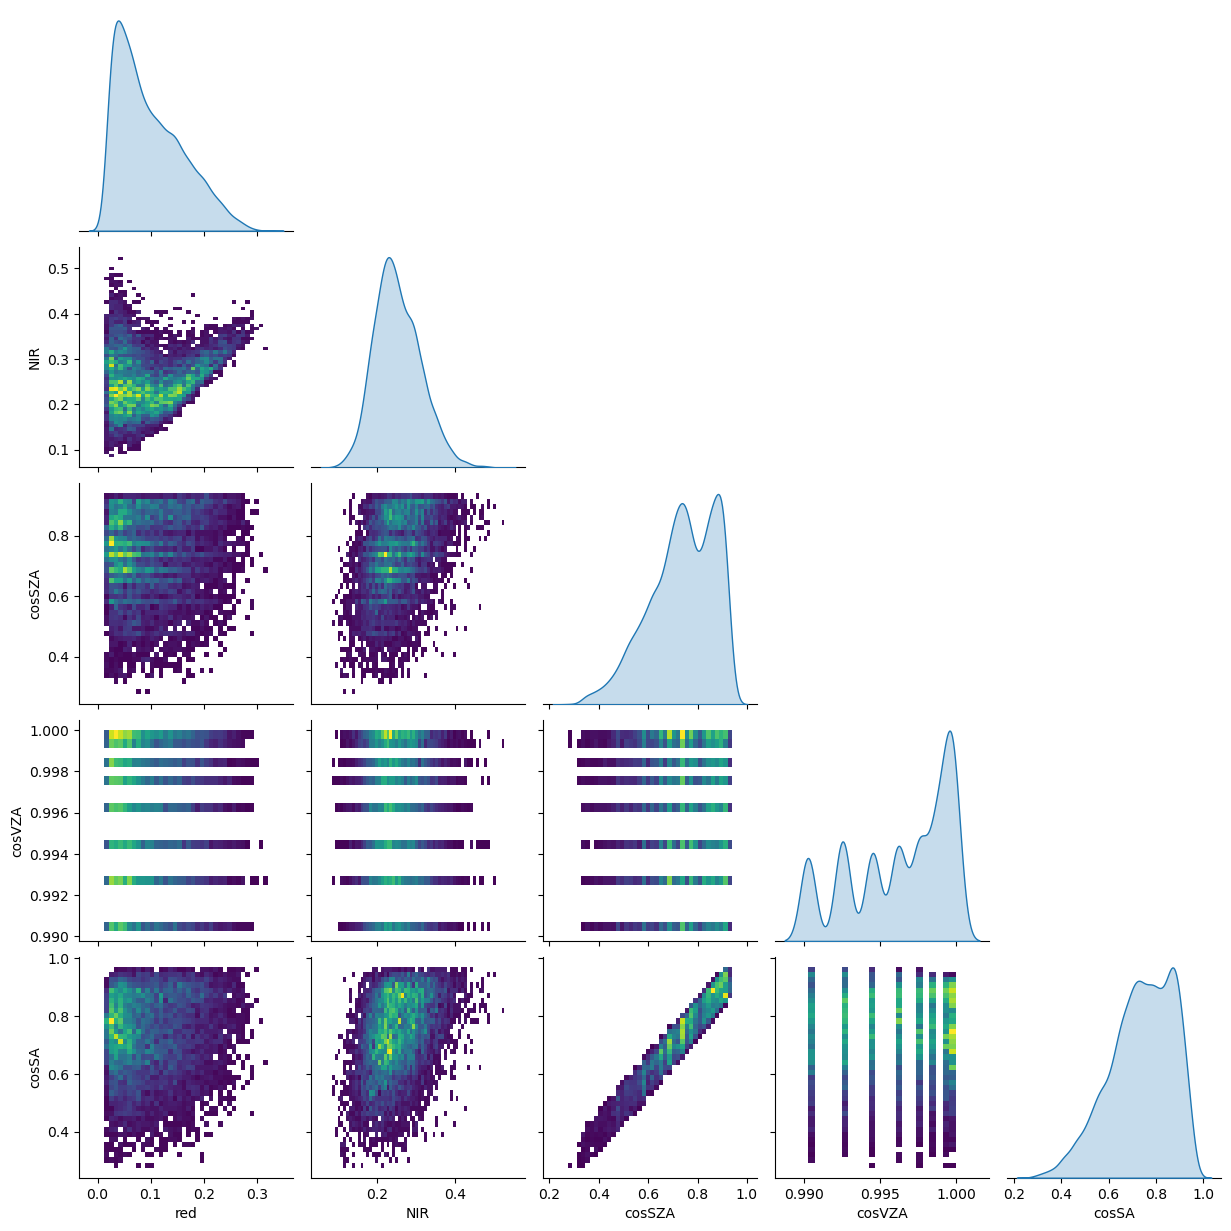

In [16]:
pairplot = sns.pairplot(dfALLtrimKANG.loc[dfALLtrimKANG['LC_type3']<9][['red','NIR','cosSZA','cosVZA','cosSA']].sample(10000).divide(10000),plot_kws={'cmap':'viridis'},kind='hist',diag_kind='kde',corner=True)
#pairplot.fig.savefig("Figure4.png", bbox_inches='tight')

Reading in calibration and validation data.

In [17]:
# Validation data for LAI and FAPAR
valbiomeDictLAI = pd.read_pickle('G:/cassidy/MODISLANDSAT/valbiomeDictLAI.pkl')
valbiomeDictFAPAR = pd.read_pickle('G:/cassidy/MODISLANDSAT/valbiomeDictFAPAR.pkl')

# Calibration data for LAI and FAPAR
calbiomeDictLAI = pd.read_pickle('G:/cassidy/MODISLANDSAT/calbiomeDictLAI.pkl')
calbiomeDictFAPAR = pd.read_pickle('G:/cassidy/MODISLANDSAT/calbiomeDictFAPAR.pkl')

# Kang's calibration data for LAI and FAPAR
calbiomeDictLAIKANG = pd.read_pickle('G:/cassidy/MODISLANDSAT/calbiomeDictLAIKANG.pkl')
calbiomeDictFAPARKANG = pd.read_pickle('G:/cassidy/MODISLANDSAT/calbiomeDictFAPARKANG.pkl')

# https://drive.google.com/drive/folders/1jVKwxWPlH7nYnpL1yJAUD2jFkXV3A1kf?usp=share_link

In [18]:
# Regressors used in fitting the Random Forests
regressors = ['Lat','Lon','red','green','NIR','SWIR1','NDVI','NDWI','cosSZA','cosSA']

# Responses in the Random Forests
LAI = 'LAI'
FAPAR = 'FAPAR'

Fitting a Random Forests for LAI using the NAIVE method

In [41]:
# Empty arrays used later to concatenate dataframes of all LC_Types
dfsLAI = []
dfsLAI10 = []

# Looping through each LC_Type
for LC_Type3 in calbiomeDictLAI:
    # Only fit Random Forests for LC_Types 1-8
    if LC_Type3 <= 8:
        
        # Extracting the dataframe from the calibration and validation data for the LC_Type
        # Only 10000 samples are used from the calibration data
        dfcal = calbiomeDictLAI[LC_Type3]['DF'].sample(10000)
        dfval = valbiomeDictLAI[LC_Type3]['DF']
        
        # Fitting a Random Forest with min leaf size equal to 50
        calbiomeDictLAI[LC_Type3]['regr50'] = RandomForestRegressor(min_samples_leaf = 50)
        calbiomeDictLAI[LC_Type3]['regr50'].fit(dfcal[regressors], dfcal[LAI])
        
        # Fitting a Random Forest with min leaf size equal to 10
        calbiomeDictLAI[LC_Type3]['regr10'] = RandomForestRegressor(min_samples_leaf = 10)
        calbiomeDictLAI[LC_Type3]['regr10'].fit(dfcal[regressors], dfcal[LAI])
        
        trueLAI = dfval[LAI]
        
        # Predicting LAI with the Random Forest using the validation data
        predLAI50 = calbiomeDictLAI[LC_Type3]['regr50'].predict(dfval[regressors])
        predLAI10 = calbiomeDictLAI[LC_Type3]['regr10'].predict(dfval[regressors])
        
        # Determining the number of leaf nodes in each Random Forest
        n50 = 0
        for tree in calbiomeDictLAI[LC_Type3]['regr50'].estimators_:
            n50 += tree.get_n_leaves()
        n10 = 0
        for tree in calbiomeDictLAI[LC_Type3]['regr10'].estimators_:
            n10 += tree.get_n_leaves()
        
        # Inserting the new statistics as a dataframe into the dictionary
        valbiomeDictLAI[LC_Type3]['dfNAIVE50LAI'] = pd.DataFrame(data={
            'LAI': trueLAI,
            'Predicted LAI': predLAI50,
            'LC_Type3': LC_Type3,
            'R2': calbiomeDictLAI[LC_Type3]['regr50'].score(dfval[regressors], trueLAI),
            'RMSE': metrics.mean_squared_error(predLAI50, trueLAI, squared=False),
            'Nodes': n50})
        
        valbiomeDictLAI[LC_Type3]['dfNAIVE10LAI'] = pd.DataFrame(data={
            'LAI': trueLAI,
            'Predicted LAI': predLAI10,
            'LC_Type3': LC_Type3,
            'R2': calbiomeDictLAI[LC_Type3]['regr10'].score(dfval[regressors], trueLAI),
            'RMSE': metrics.mean_squared_error(predLAI10, trueLAI, squared=False),
            'Nodes': n10})
        
        # Merge two methods before sampling
        df = valbiomeDictLAI[LC_Type3]['dfNAIVE50LAI'].join(valbiomeDictLAI[LC_Type3]['dfNAIVE10LAI'], lsuffix='_50', rsuffix='_10')
        
        # Appending the dataframes to an array used to concatenate later
        dfsLAI.append(df.sample(1000))
        
# Concatenating the dataframes with the predicted LAI values for all LC_Types
dfcalbiomeLAI = pd.concat(dfsLAI)

In [43]:
for LC_Type3 in valbiomeDictLAI:
    if LC_Type3 <= 8:
        print(LC_Type3, valbiomeDictLAI[LC_Type3]['dfNAIVE50LAI']['Nodes'].unique()[0], valbiomeDictLAI[LC_Type3]['dfNAIVE10LAI']['Nodes'].unique()[0])

6 9688 49561
4 9610 49459
7 9692 49409
2 9575 44672
1 9662 47633
8 9708 49536
3 9702 49526
5 9780 49576


R^2 and RMSE values for LAI Random Forest with min 50 leaf samples

In [21]:
for LC_Type3 in valbiomeDictLAI:
    if LC_Type3 <= 8:
        df = valbiomeDictLAI[LC_Type3]['dfNAIVE50LAI'][['R2', 'RMSE']]
        print(LC_Type3, df['R2'].unique()[0], df['RMSE'].unique()[0])

6 0.8375823754031047 7.664674602257081
4 0.6297222206727742 11.774038469345003
7 0.6921153713092791 10.112314173411294
2 0.8173694936974024 5.276094480853483
1 0.5832116265989593 11.738023698269433
8 0.785306530458693 8.806633647153815
3 0.635009365524221 11.644550529794191
5 0.5930422986681588 11.26499008796877


R^2 and RMSE values for LAI Random Forest with min 10 leaf samples

In [22]:
for LC_Type3 in valbiomeDictLAI:
    if LC_Type3 <= 8:
        df = valbiomeDictLAI[LC_Type3]['dfNAIVE10LAI'][['R2', 'RMSE']]
        print(LC_Type3, df['R2'].unique()[0], df['RMSE'].unique()[0])

6 0.8499233301350095 7.36773058802951
4 0.6511748903272585 11.427875357620325
7 0.7141267730771822 9.744135004310182
2 0.8609015151787188 4.604549033627395
1 0.6332660094104847 11.010645147068141
8 0.8100566699800962 8.283474446086316
3 0.6828963125285643 10.853817515563996
5 0.6518728056905907 10.418978770732625


Scatterplotting True LAI vs Predicted LAI

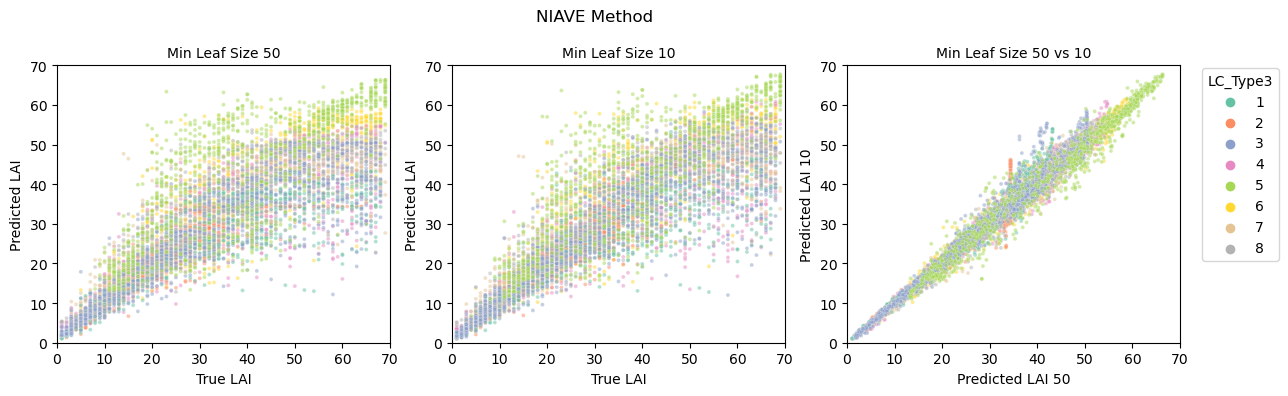

In [23]:
fig, axs = plt.subplots(1,3, figsize=(12, 4))
sns.scatterplot(dfcalbiomeLAI, x='LAI_50', y='Predicted LAI_50', ax=axs[0], hue='LC_Type3_50', palette='Set2', s=8, alpha=0.5, legend=0)
sns.scatterplot(dfcalbiomeLAI, x='LAI_10', y='Predicted LAI_10', ax=axs[1], hue='LC_Type3_50', palette='Set2', s=8, alpha=0.5)
sns.scatterplot(dfcalbiomeLAI, x='Predicted LAI_50', y='Predicted LAI_10', ax=axs[2], hue='LC_Type3_50', palette='Set2', s=8, alpha=0.5, legend=0)

fig.suptitle('NIAVE Method')
axs[0].set_title('Min Leaf Size 50', size=10)
axs[0].set(xlabel='True LAI', ylabel='Predicted LAI')
axs[0].set_xlim(0, 70)
axs[0].set_ylim(0, 70)

axs[1].set_title('Min Leaf Size 10', size=10)
axs[1].set(xlabel='True LAI', ylabel='Predicted LAI')
axs[1].set_xlim(0, 70)
axs[1].set_ylim(0, 70)

axs[2].set_title('Min Leaf Size 50 vs 10', size=10)
axs[2].set(xlabel='Predicted LAI 50', ylabel='Predicted LAI 10')
axs[2].set_xlim(0, 70)
axs[2].set_ylim(0, 70)

fig.tight_layout()

handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper left", bbox_to_anchor=(1,0.85), title = "LC_Type3")
axs[1].get_legend().set_visible(False)

plt.show()

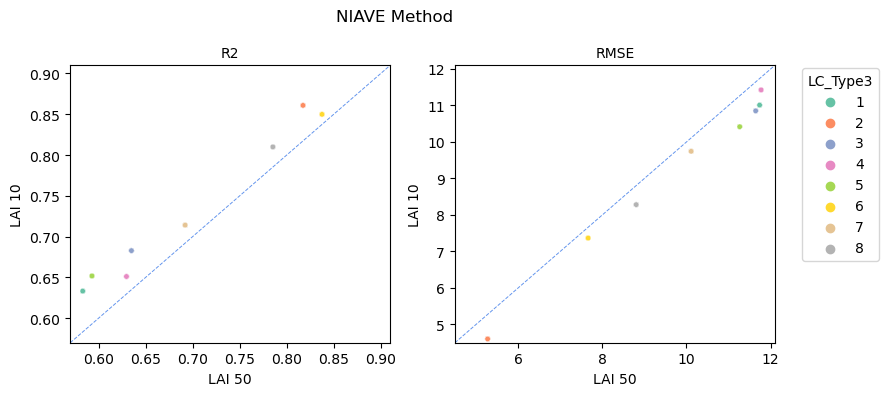

In [24]:
fig, axs = plt.subplots(1,2, figsize=(8, 4))
sns.scatterplot(dfcalbiomeLAI, x='R2_50', y='R2_10', ax=axs[0], hue='LC_Type3_50', palette='Set2', s=15, alpha=1, legend=0)
sns.scatterplot(dfcalbiomeLAI, x='RMSE_50', y='RMSE_10', ax=axs[1], hue='LC_Type3_50', palette='Set2', s=15, alpha=1)

fig.suptitle('NIAVE Method')

axs[0].set_title('R2', size=10)
axs[0].set(xlabel='LAI 50', ylabel='LAI 10')
axs[0].set_xlim(0.57, 0.91)
axs[0].set_ylim(0.57, 0.91)
axs[0].axline((0,0), slope=1, c='cornflowerblue', lw=0.7, ls='--')

axs[1].set_title('RMSE', size=10)
axs[1].set(xlabel='LAI 50', ylabel='LAI 10')
axs[1].set_xlim(4.5, 12.1)
axs[1].set_ylim(4.5, 12.1)
axs[1].axline((0,0), slope=1, c='cornflowerblue', lw=0.7, ls='--')

fig.tight_layout()

handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper left", bbox_to_anchor=(1,0.85), title = "LC_Type3")
axs[1].get_legend().set_visible(False)

plt.show()

Fitting a Random Forests for FAPAR using the NAIVE method

In [44]:
# Empty arrays used later to concatenate dataframes of all LC_Types
dfsFAPAR = []

# Looping through each LC_Type
for LC_Type3 in calbiomeDictFAPAR:
    # Only fit Random Forests for LC_Types 1-8
    if LC_Type3 <= 8:
        
        # Extracting the dataframe from the calibration and validation data for the LC_Type
        # Only 10000 samples are used from the calibration data
        dfcal = calbiomeDictFAPAR[LC_Type3]['DF'].sample(10000)
        dfval = calbiomeDictFAPAR[LC_Type3]['DF']
        
        # Fitting a Random Forest with min leaf size equal to 50
        calbiomeDictFAPAR[LC_Type3]['regr50'] = RandomForestRegressor(min_samples_leaf = 50)
        calbiomeDictFAPAR[LC_Type3]['regr50'].fit(dfcal[regressors], dfcal[FAPAR])
        
        # Fitting a Random Forest with min leaf size equal to 10
        calbiomeDictFAPAR[LC_Type3]['regr10'] = RandomForestRegressor(min_samples_leaf = 10)
        calbiomeDictFAPAR[LC_Type3]['regr10'].fit(dfcal[regressors], dfcal[FAPAR])
        
        trueFAPAR = dfval[FAPAR]
        
        # Predicting FAPAR with the Random Forest using the validation data
        predFAPAR50 = calbiomeDictFAPAR[LC_Type3]['regr50'].predict(dfval[regressors])
        predFAPAR10 = calbiomeDictFAPAR[LC_Type3]['regr10'].predict(dfval[regressors])
        
        # Determining the number of leaf nodes in each Random Forest
        n50 = 0
        for tree in calbiomeDictFAPAR[LC_Type3]['regr50'].estimators_:
            n50 += tree.get_n_leaves()
        n10 = 0
        for tree in calbiomeDictFAPAR[LC_Type3]['regr10'].estimators_:
            n10 += tree.get_n_leaves()
        
        # Inserting the new statistics as a dataframe into the dictionary
        valbiomeDictFAPAR[LC_Type3]['dfNAIVE50FAPAR'] = pd.DataFrame(data={
            'FAPAR': trueFAPAR,
            'Predicted FAPAR': predFAPAR50,
            'LC_Type3': LC_Type3,
            'R2': calbiomeDictFAPAR[LC_Type3]['regr50'].score(dfval[regressors], trueFAPAR),
            'RMSE': metrics.mean_squared_error(predFAPAR50, trueFAPAR, squared=False),
            'Nodes': n50})
        
        valbiomeDictFAPAR[LC_Type3]['dfNAIVE10FAPAR'] = pd.DataFrame(data={
            'FAPAR': trueFAPAR,
            'Predicted FAPAR': predFAPAR10,
            'LC_Type3': LC_Type3,
            'R2': calbiomeDictFAPAR[LC_Type3]['regr10'].score(dfval[regressors], trueFAPAR),
            'RMSE': metrics.mean_squared_error(predFAPAR10, trueFAPAR, squared=False),
            'Nodes': n10})
        
        # Merge two methods before sampling
        df = valbiomeDictFAPAR[LC_Type3]['dfNAIVE50FAPAR'].join(valbiomeDictFAPAR[LC_Type3]['dfNAIVE10FAPAR'], lsuffix='_50', rsuffix='_10')
        
        # Appending the dataframes to an array used to concatenate later
        dfsFAPAR.append(df.sample(1000))
        
# Concatenating the dataframes with the predicted LAI values for all LC_Types
dfcalbiomeFAPAR = pd.concat(dfsFAPAR)

In [46]:
for LC_Type3 in valbiomeDictFAPAR:
    if LC_Type3 <= 8:
        print(LC_Type3, valbiomeDictFAPAR[LC_Type3]['dfNAIVE50FAPAR']['Nodes'].unique()[0], valbiomeDictFAPAR[LC_Type3]['dfNAIVE10FAPAR']['Nodes'].unique()[0])

6 9662 49491
4 9723 49484
7 9808 49586
2 9646 49445
1 9649 49573
8 9700 49663
3 9705 49480
5 9728 50107


R^2 and RMSE values for FAPAR Random Forest with min 50 leaf samples

In [26]:
for LC_Type3 in valbiomeDictFAPAR:
    if LC_Type3 <= 8:
        df = valbiomeDictFAPAR[LC_Type3]['dfNAIVE50FAPAR'][['R2', 'RMSE']]
        print(LC_Type3, df['R2'].unique()[0], df['RMSE'].unique()[0])

6 0.9162044456294989 5.4806029331582184
4 0.8170035382596892 7.543143444917641
7 0.6781280190053853 7.384184414837324
2 0.9741274685873995 3.7218762370990293
1 0.9406624368049086 5.2860709836389494
8 0.8608078638134479 6.269032655774966
3 0.9138724403862905 6.330239566409008
5 0.7195697809599197 5.020209440524842


R^2 and RMSE values for FAPAR Random Forest with min 10 leaf samples

In [27]:
for LC_Type3 in valbiomeDictFAPAR:
    if LC_Type3 <= 8:
        df = valbiomeDictFAPAR[LC_Type3]['dfNAIVE10FAPAR'][['R2', 'RMSE']]
        print(LC_Type3, df['R2'].unique()[0], df['RMSE'].unique()[0])

6 0.924869299075525 5.189512589180524
4 0.8376913996301987 7.103980924737075
7 0.70952735450413 7.014772131630042
2 0.977108767134908 3.500878654286819
1 0.9443528664067223 5.1190519432804935
8 0.8849549996715423 5.699372688779582
3 0.922400286783464 6.008680796694217
5 0.7709171751909851 4.537385672184148


Scatterplotting True FAPAR vs Predicted FAPAR with the NAIVE Method

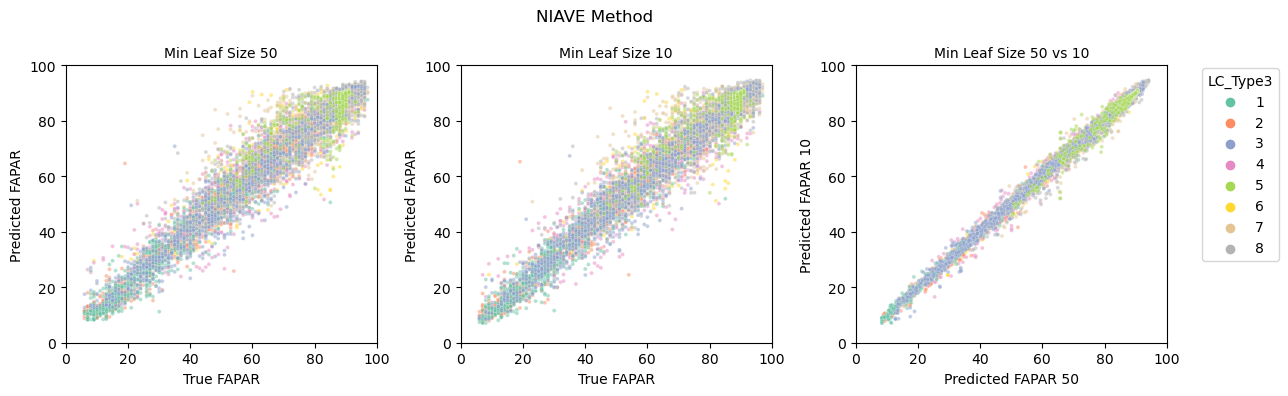

In [28]:
fig, axs = plt.subplots(1,3, figsize=(12, 4))
sns.scatterplot(dfcalbiomeFAPAR, x='FAPAR_50', y='Predicted FAPAR_50', ax=axs[0], hue='LC_Type3_50', palette='Set2', s=8, alpha=0.5, legend=0)
sns.scatterplot(dfcalbiomeFAPAR, x='FAPAR_10', y='Predicted FAPAR_10', ax=axs[1], hue='LC_Type3_50', palette='Set2', s=8, alpha=0.5)
sns.scatterplot(dfcalbiomeFAPAR, x='Predicted FAPAR_50', y='Predicted FAPAR_10', ax=axs[2], hue='LC_Type3_50', palette='Set2', s=8, alpha=0.5, legend=0)

fig.suptitle('NIAVE Method')
axs[0].set_title('Min Leaf Size 50', size=10)
axs[0].set(xlabel='True FAPAR', ylabel='Predicted FAPAR')
axs[0].set_xlim(0, 100)
axs[0].set_ylim(0, 100)

axs[1].set_title('Min Leaf Size 10', size=10)
axs[1].set(xlabel='True FAPAR', ylabel='Predicted FAPAR')
axs[1].set_xlim(0, 100)
axs[1].set_ylim(0, 100)

axs[2].set_title('Min Leaf Size 50 vs 10', size=10)
axs[2].set(xlabel='Predicted FAPAR 50', ylabel='Predicted FAPAR 10')
axs[2].set_xlim(0, 100)
axs[2].set_ylim(0, 100)

fig.tight_layout()

handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper left", bbox_to_anchor=(1,0.85), title = "LC_Type3")
axs[1].get_legend().set_visible(False)

plt.show()

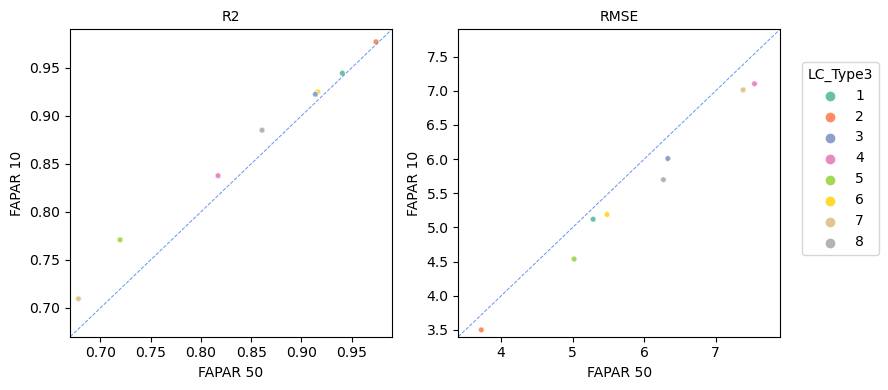

In [29]:
fig, axs = plt.subplots(1,2, figsize=(8, 4))
sns.scatterplot(dfcalbiomeFAPAR, x='R2_50', y='R2_10', ax=axs[0], hue='LC_Type3_50', palette='Set2', s=15, alpha=1, legend=0)
sns.scatterplot(dfcalbiomeFAPAR, x='RMSE_50', y='RMSE_10', ax=axs[1], hue='LC_Type3_50', palette='Set2', s=15, alpha=1)

axs[0].set_title('R2', size=10)
axs[0].set(xlabel='FAPAR 50', ylabel='FAPAR 10')
axs[0].set_xlim(0.67, 0.99)
axs[0].set_ylim(0.67, 0.99)
axs[0].axline((0,0), slope=1, c='cornflowerblue', lw=0.7, ls='--')

axs[1].set_title('RMSE', size=10)
axs[1].set(xlabel='FAPAR 50', ylabel='FAPAR 10')
axs[1].set_xlim(3.4, 7.9)
axs[1].set_ylim(3.4, 7.9)
axs[1].axline((0,0), slope=1, c='cornflowerblue', lw=0.7, ls='--')

fig.tight_layout()

handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper left", bbox_to_anchor=(1,0.85), title = "LC_Type3")
axs[1].get_legend().set_visible(False)

plt.show()

Fitting a Random Forests for LAI using the KANG method

In [47]:
# Empty arrays used later to concatenate dataframes of all LC_Types
dfsLAI = []

# Looping through each LC_Type
for LC_Type3 in calbiomeDictLAIKANG:
    
    # Only fit Random Forests for LC_Types 1-8
    if LC_Type3 <= 8:
        
        # Extracting the dataframe from the calibration and validation data for the LC_Type
        # Only 10000 samples are used from the calibration data
        dfcal = calbiomeDictLAIKANG[LC_Type3]['DF'].sample(10000)
        dfval = calbiomeDictLAIKANG[LC_Type3]['DF']
        
        # Fitting a Random Forest with min leaf size equal to 50
        calbiomeDictLAIKANG[LC_Type3]['regr50'] = RandomForestRegressor(min_samples_leaf = 50)
        calbiomeDictLAIKANG[LC_Type3]['regr50'].fit(dfcal[regressors], dfcal[LAI])
        
        # Fitting a Random Forest with min leaf size equal to 10
        calbiomeDictLAIKANG[LC_Type3]['regr10'] = RandomForestRegressor(min_samples_leaf = 10)
        calbiomeDictLAIKANG[LC_Type3]['regr10'].fit(dfcal[regressors], dfcal[LAI])
        
        trueLAI = dfval[LAI]
        
        # Predicting LAI with the Random Forest using the validation data
        predLAI50 = calbiomeDictLAIKANG[LC_Type3]['regr50'].predict(dfval[regressors])
        predLAI10 = calbiomeDictLAIKANG[LC_Type3]['regr10'].predict(dfval[regressors])
        
        # Determining the number of leaf nodes in each Random Forest
        n50 = 0
        for tree in calbiomeDictLAIKANG[LC_Type3]['regr50'].estimators_:
            n50 += tree.get_n_leaves()
        n10 = 0
        for tree in calbiomeDictLAIKANG[LC_Type3]['regr10'].estimators_:
            n10 += tree.get_n_leaves()
        
        # Inserting the new statistics as a dataframe into the dictionary
        valbiomeDictLAI[LC_Type3]['dfKANG50LAI'] = pd.DataFrame(data={
            'LAI': trueLAI,
            'Predicted LAI': predLAI50,
            'LC_Type3': LC_Type3,
            'R2': calbiomeDictLAIKANG[LC_Type3]['regr50'].score(dfval[regressors], trueLAI),
            'RMSE': metrics.mean_squared_error(predLAI50, trueLAI, squared=False),
            'Nodes': n50})
        
        valbiomeDictLAI[LC_Type3]['dfKANG10LAI'] = pd.DataFrame(data={
            'LAI': trueLAI,
            'Predicted LAI': predLAI10,
            'LC_Type3': LC_Type3,
            'R2': calbiomeDictLAIKANG[LC_Type3]['regr10'].score(dfval[regressors], trueLAI),
            'RMSE': metrics.mean_squared_error(predLAI10, trueLAI, squared=False),
            'Nodes': n10})
        
        # Merge two methods before sampling
        df = valbiomeDictLAI[LC_Type3]['dfKANG50LAI'].join(valbiomeDictLAI[LC_Type3]['dfKANG10LAI'], lsuffix='_50', rsuffix='_10')
        
        # Appending the dataframes to an array used to concatenate later
        dfsLAI.append(df.sample(1000))
        
# Concatenating the dataframes with the predicted LAI values for all LC_Types
dfcalbiomeLAIKANG = pd.concat(dfsLAI)

In [48]:
for LC_Type3 in valbiomeDictLAI:
    if LC_Type3 <= 8:
        print(LC_Type3, valbiomeDictLAI[LC_Type3]['dfKANG50LAI']['Nodes'].unique()[0], valbiomeDictLAI[LC_Type3]['dfKANG10LAI']['Nodes'].unique()[0])

6 9666 49510
4 9610 49489
7 9700 49440
2 9557 44219
1 9672 47748
8 9660 49454
3 9659 49463
5 9739 49630


R^2 and RMSE values for LAI Random Forest with min 50 leaf samples

In [31]:
for LC_Type3 in valbiomeDictLAI:
    if LC_Type3 <= 8:
        df = valbiomeDictLAI[LC_Type3]['dfKANG50LAI'][['R2', 'RMSE']]
        print(LC_Type3, df['R2'].unique()[0], df['RMSE'].unique()[0])

6 0.8860302722298785 6.452498554070712
4 0.7518163830887241 6.464304466865364
7 0.7008568537173945 7.8639850137569045
2 0.9333434838060739 1.82700165662661
1 0.8460752945713228 3.633354481035797
8 0.8304555062090865 6.678681334951824
3 0.8124497748429382 4.753741277053345
5 0.7269369392419687 7.81804915429349


R^2 and RMSE values for LAI Random Forest with min 10 leaf samples

In [32]:
for LC_Type3 in valbiomeDictLAI:
    if LC_Type3 <= 8:
        df = valbiomeDictLAI[LC_Type3]['dfKANG10LAI'][['R2', 'RMSE']]
        print(LC_Type3, df['R2'].unique()[0], df['RMSE'].unique()[0])

6 0.8965462553610267 6.147609428574542
4 0.7682655100568077 6.246411436842194
7 0.7220441230818393 7.580381780333354
2 0.9468653913703986 1.631196866258838
1 0.8618175082178956 3.4425488795477444
8 0.8576840083875285 6.118933434827859
3 0.832859439953916 4.487636514629955
5 0.7723822507312929 7.137892154952338


Scatterplotting True LAI vs Predicted LAI

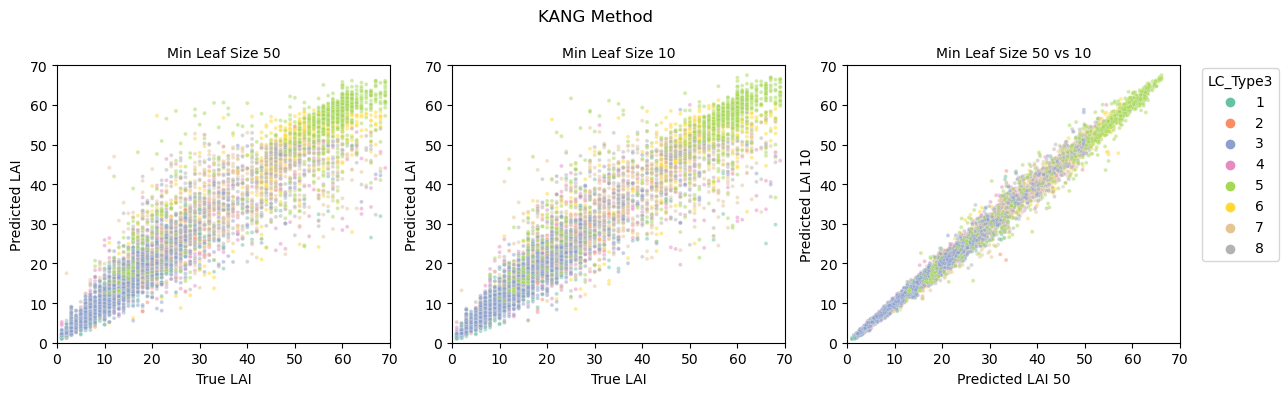

In [33]:
fig, axs = plt.subplots(1,3, figsize=(12, 4))
sns.scatterplot(dfcalbiomeLAIKANG, x='LAI_50', y='Predicted LAI_50', ax=axs[0], hue='LC_Type3_50', palette='Set2', s=8, alpha=0.5, legend=0)
sns.scatterplot(dfcalbiomeLAIKANG, x='LAI_10', y='Predicted LAI_10', ax=axs[1], hue='LC_Type3_50', palette='Set2', s=8, alpha=0.5)
sns.scatterplot(dfcalbiomeLAIKANG, x='Predicted LAI_50', y='Predicted LAI_10', ax=axs[2], hue='LC_Type3_50', palette='Set2', s=8, alpha=0.5, legend=0)

fig.suptitle('KANG Method')
axs[0].set_title('Min Leaf Size 50', size=10)
axs[0].set(xlabel='True LAI', ylabel='Predicted LAI')
axs[0].set_xlim(0, 70)
axs[0].set_ylim(0, 70)

axs[1].set_title('Min Leaf Size 10', size=10)
axs[1].set(xlabel='True LAI', ylabel='Predicted LAI')
axs[1].set_xlim(0, 70)
axs[1].set_ylim(0, 70)

axs[2].set_title('Min Leaf Size 50 vs 10', size=10)
axs[2].set(xlabel='Predicted LAI 50', ylabel='Predicted LAI 10')
axs[2].set_xlim(0, 70)
axs[2].set_ylim(0, 70)

fig.tight_layout()

handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper left", bbox_to_anchor=(1,0.85), title = "LC_Type3")
axs[1].get_legend().set_visible(False)

plt.show()

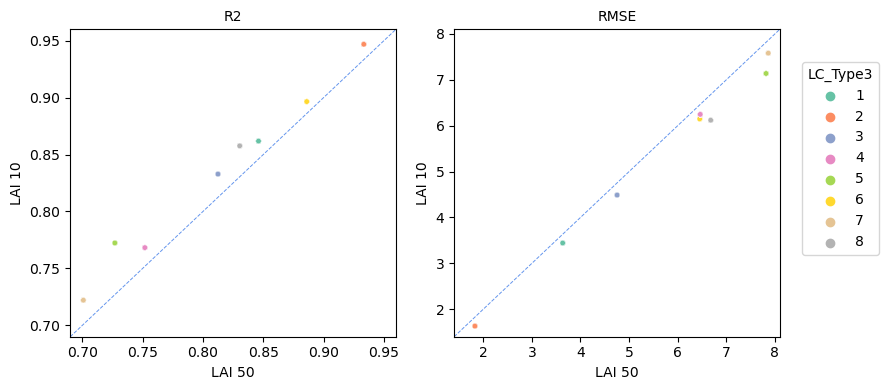

In [34]:
fig, axs = plt.subplots(1,2, figsize=(8, 4))
sns.scatterplot(dfcalbiomeLAIKANG, x='R2_50', y='R2_10', ax=axs[0], hue='LC_Type3_50', palette='Set2', s=15, alpha=1, legend=0)
sns.scatterplot(dfcalbiomeLAIKANG, x='RMSE_50', y='RMSE_10', ax=axs[1], hue='LC_Type3_50', palette='Set2', s=15, alpha=1)

axs[0].set_title('R2', size=10)
axs[0].set(xlabel='LAI 50', ylabel='LAI 10')
axs[0].set_xlim(0.69, 0.96)
axs[0].set_ylim(0.69, 0.96)
axs[0].axline((0,0), slope=1, c='cornflowerblue', lw=0.7, ls='--')

axs[1].set_title('RMSE', size=10)
axs[1].set(xlabel='LAI 50', ylabel='LAI 10')
axs[1].set_xlim(1.4, 8.1)
axs[1].set_ylim(1.4, 8.1)
axs[1].axline((0,0), slope=1, c='cornflowerblue', lw=0.7, ls='--')

fig.tight_layout()

handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper left", bbox_to_anchor=(1,0.85), title = "LC_Type3")
axs[1].get_legend().set_visible(False)

plt.show()

Fitting a Random Forests for FAPAR using the KANG method

In [49]:
# Empty arrays used later to concatenate dataframes of all LC_Types
dfsFAPAR = []

# Looping through each LC_Type
for LC_Type3 in calbiomeDictFAPARKANG:
    
    # Only fit Random Forests for LC_Types 1-8
    if LC_Type3 <= 8:
        
        # Extracting the dataframe from the calibration and validation data for the LC_Type
        # Only 10000 samples are used from the calibration data
        dfcal = calbiomeDictFAPARKANG[LC_Type3]['DF'].sample(10000)
        dfval = calbiomeDictFAPARKANG[LC_Type3]['DF']
        
        # Fitting a Random Forest with min leaf size equal to 50
        calbiomeDictFAPARKANG[LC_Type3]['regr50'] = RandomForestRegressor(min_samples_leaf = 50)
        calbiomeDictFAPARKANG[LC_Type3]['regr50'].fit(dfcal[regressors], dfcal[FAPAR])
        
        # Fitting a Random Forest with min leaf size equal to 10
        calbiomeDictFAPARKANG[LC_Type3]['regr10'] = RandomForestRegressor(min_samples_leaf = 10)
        calbiomeDictFAPARKANG[LC_Type3]['regr10'].fit(dfcal[regressors], dfcal[FAPAR])
        
        trueFAPAR = dfval[FAPAR]
        
        # Predicting FAPAR with the Random Forest using the validation data 
        predFAPAR50 = calbiomeDictFAPARKANG[LC_Type3]['regr50'].predict(dfval[regressors])
        predFAPAR10 = calbiomeDictFAPARKANG[LC_Type3]['regr10'].predict(dfval[regressors])
        
        # Determining the number of leaf nodes in each Random Forest
        n50 = 0
        for tree in calbiomeDictFAPARKANG[LC_Type3]['regr50'].estimators_:
            n50 += tree.get_n_leaves()
        n10 = 0
        for tree in calbiomeDictFAPARKANG[LC_Type3]['regr10'].estimators_:
            n10 += tree.get_n_leaves()
        
        # Inserting the new statistics as a dataframe into the dictionary
        valbiomeDictFAPAR[LC_Type3]['dfKANG50FAPAR'] = pd.DataFrame(data={
            'FAPAR': trueFAPAR,
            'Predicted FAPAR': predFAPAR50,
            'LC_Type3': LC_Type3,
            'R2': calbiomeDictFAPARKANG[LC_Type3]['regr50'].score(dfval[regressors], trueFAPAR),
            'RMSE': metrics.mean_squared_error(predFAPAR50, trueFAPAR, squared=False),
            'Nodes': n50})
        
        valbiomeDictFAPAR[LC_Type3]['dfKANG10FAPAR'] = pd.DataFrame(data={
            'FAPAR': trueFAPAR,
            'Predicted FAPAR': predFAPAR10,
            'LC_Type3': LC_Type3,
            'R2': calbiomeDictFAPARKANG[LC_Type3]['regr10'].score(dfval[regressors], trueFAPAR),
            'RMSE': metrics.mean_squared_error(predFAPAR10, trueFAPAR, squared=False),
            'Nodes': n10})
        
        # Merge two methods before sampling
        df = valbiomeDictFAPAR[LC_Type3]['dfKANG50FAPAR'].join(valbiomeDictFAPAR[LC_Type3]['dfKANG10FAPAR'], lsuffix='_50', rsuffix='_10')
        
        # Appending the dataframes to an array used to concatenate later
        dfsFAPAR.append(df.sample(1000))
        
# Concatenating the dataframes with the predicted LAI values for all LC_Types
dfcalbiomeFAPARKANG = pd.concat(dfsFAPAR)

In [50]:
for LC_Type3 in valbiomeDictFAPAR:
    if LC_Type3 <= 8:
        print(LC_Type3, valbiomeDictFAPAR[LC_Type3]['dfKANG50FAPAR']['Nodes'].unique()[0], valbiomeDictFAPAR[LC_Type3]['dfKANG10FAPAR']['Nodes'].unique()[0])

6 9605 49500
4 9649 49478
7 9709 49595
2 9656 49453
1 9646 49484
8 9737 49510
3 9698 49457
5 9803 50166


R^2 and RMSE values for FAPAR Random Forest with min 50 leaf samples

In [36]:
for LC_Type3 in valbiomeDictFAPAR:
    if LC_Type3 <= 8:
        df = valbiomeDictFAPAR[LC_Type3]['dfKANG50FAPAR'][['R2', 'RMSE']]
        print(LC_Type3, df['R2'].unique()[0], df['RMSE'].unique()[0])

6 0.9152073153793272 5.51748022014704
4 0.8100337282648993 7.689943384373531
7 0.675069892753564 7.413840643910379
2 0.9733915840809412 3.7743992960612354
1 0.9349880051727044 5.544971340016961
8 0.8577846568947984 6.358213905951889
3 0.9028978042440852 6.693579197162887
5 0.7170992438387942 5.025627090324304


R^2 and RMSE values for FAPAR Random Forest with min 10 leaf samples

In [37]:
for LC_Type3 in valbiomeDictFAPAR:
    if LC_Type3 <= 8:
        df = valbiomeDictFAPAR[LC_Type3]['dfKANG10FAPAR'][['R2', 'RMSE']]
        print(LC_Type3, df['R2'].unique()[0], df['RMSE'].unique()[0])

6 0.923792442217322 5.230709656459659
4 0.8304383608976795 7.265218761428326
7 0.7041943054438462 7.073779777188551
2 0.9763688747892676 3.556972708445218
1 0.9389995041257271 5.371174256993677
8 0.8838123513119668 5.747009159477837
3 0.9132211519399382 6.327771983983689
5 0.7677386878207186 4.55367093402699


Scatterplotting True FAPAR vs Predicted FAPAR

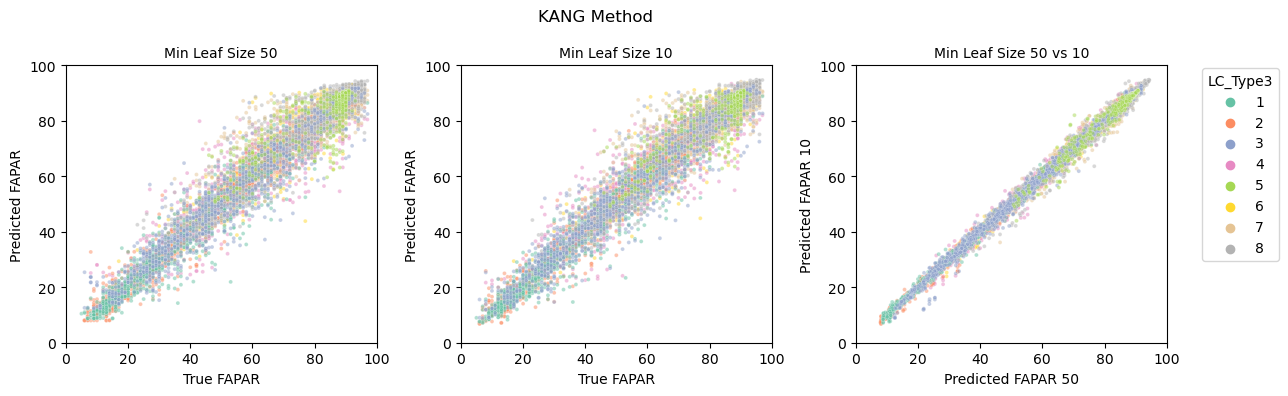

In [38]:
fig, axs = plt.subplots(1,3, figsize=(12, 4))
sns.scatterplot(dfcalbiomeFAPARKANG, x='FAPAR_50', y='Predicted FAPAR_50', ax=axs[0], hue='LC_Type3_50', palette='Set2', s=8, alpha=0.5, legend=0)
sns.scatterplot(dfcalbiomeFAPARKANG, x='FAPAR_10', y='Predicted FAPAR_10', ax=axs[1], hue='LC_Type3_50', palette='Set2', s=8, alpha=0.5)
sns.scatterplot(dfcalbiomeFAPARKANG, x='Predicted FAPAR_50', y='Predicted FAPAR_10', ax=axs[2], hue='LC_Type3_50', palette='Set2', s=8, alpha=0.5, legend=0)

fig.suptitle('KANG Method')
axs[0].set_title('Min Leaf Size 50', size=10)
axs[0].set(xlabel='True FAPAR', ylabel='Predicted FAPAR')
axs[0].set_xlim(0, 100)
axs[0].set_ylim(0, 100)

axs[1].set_title('Min Leaf Size 10', size=10)
axs[1].set(xlabel='True FAPAR', ylabel='Predicted FAPAR')
axs[1].set_xlim(0, 100)
axs[1].set_ylim(0, 100)

axs[2].set_title('Min Leaf Size 50 vs 10', size=10)
axs[2].set(xlabel='Predicted FAPAR 50', ylabel='Predicted FAPAR 10')
axs[2].set_xlim(0, 100)
axs[2].set_ylim(0, 100)

fig.tight_layout()

handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper left", bbox_to_anchor=(1,0.85), title = "LC_Type3")
axs[1].get_legend().set_visible(False)

plt.show()

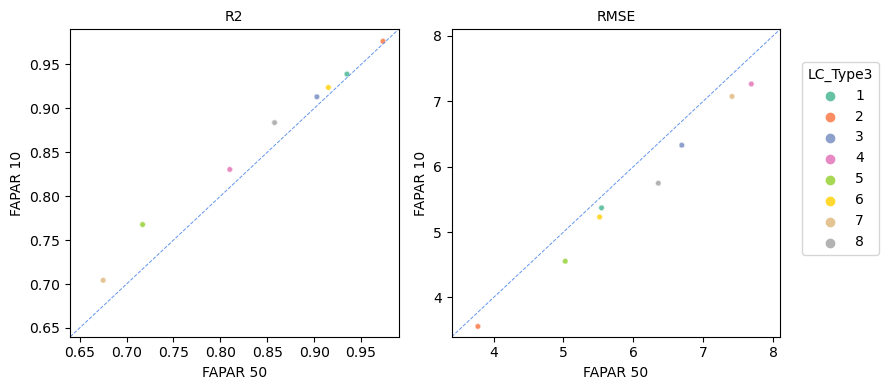

In [39]:
fig, axs = plt.subplots(1,2, figsize=(8, 4))
sns.scatterplot(dfcalbiomeFAPARKANG, x='R2_50', y='R2_10', ax=axs[0], hue='LC_Type3_50', palette='Set2', s=15, alpha=1, legend=0)
sns.scatterplot(dfcalbiomeFAPARKANG, x='RMSE_50', y='RMSE_10', ax=axs[1], hue='LC_Type3_50', palette='Set2', s=15, alpha=1)

axs[0].set_title('R2', size=10)
axs[0].set(xlabel='FAPAR 50', ylabel='FAPAR 10')
axs[0].set_xlim(0.64, 0.99)
axs[0].set_ylim(0.64, 0.99)
axs[0].axline((0,0), slope=1, c='cornflowerblue', lw=0.7, ls='--')

axs[1].set_title('RMSE', size=10)
axs[1].set(xlabel='FAPAR 50', ylabel='FAPAR 10')
axs[1].set_xlim(3.4, 8.1)
axs[1].set_ylim(3.4, 8.1)
axs[1].axline((0,0), slope=1, c='cornflowerblue', lw=0.7, ls='--')

fig.tight_layout()

handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper left", bbox_to_anchor=(1,0.85), title = "LC_Type3")
axs[1].get_legend().set_visible(False)

plt.show()